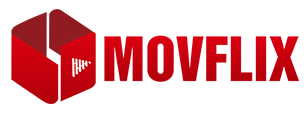

<a id="toc"></a>

# <h2 style="background-color:#800000; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;" class="list-group-item list-group-item-action active" data-toggle="list" role="tablist" aria-controls="home">TABLE OF CONTENTS</h2>

* [1) Business Problem](#1)
* [2) Importing libraries and dataset](#2)
* [3) Preprocessing Data](#3)
* [3) Data Retrival in Empty Lists](#3)
* [4) Functions - ](#4)
    * [4.1 - Registration](#4.1)
    * [4.2 - Login](#4.2)
    * [4.3 - Forget Password](#4.3) 
    * [4.4 - Data Retrival in Empty List](#4.4)
    * [4.5 Output Display Format](#4.5)
    * [4.6 Movies Name by Min & Max Votes](#4.6)
    * [4.7 Movies Search by Min and Max duration](#4.7)
    * [4.8 Movies Details by Title](#4.8)
    * [4.9 Movies Name by Director Name ](#4.9)
    * [4.10 Random Movie Names ](#4.10)
    * [4.11 Movies Search by Genre, Language & Duration](#4.11)
    * [4.12 Movies Search by Genre, Language & Votes](#4.12)
    * [4.13 Movies Search by Duration, Language & Votes](#4.13)    
* [5) Menu to be Displayes](#5)
* [6) MovFlix Home Page](#6)
* [7) Applications](#7)

<a id="1"></a>
## <p style="background-color:#800000; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 1. Business Problem</p>


### <p  style = "font-family:newtimeroman; font-size:100%; color:#123456"> In today's busy schedule when we have got very less time for ourselves, where we decide to watch something worthy to relax.We all want to do "MovFlix &  Chill!". </p> 
### <p  style = "font-family:newtimeroman; font-size:100%; color:#123456">We have got millions of movies to choose from! We have a wide variety of movies some short some long, some 10/10 and some 1/10, from hindi, english, spanish to every possible language. But the question remains what to watch?</p>

<a id="2"></a>
## <p style="background-color:#800000; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 2. Importing Libraries & Dataset</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [1]:
import pandas as pd
import csv
from random import randrange
import warnings

warnings.filterwarnings('ignore')


# import classes and functions to perform email trigger functionality
import smtplib

from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.message import EmailMessage
from email.mime.base import MIMEBase

In [2]:
tmdb = pd.read_csv("IMDb movies.csv")


<a id="3"></a>
## <p style="background-color:#800000; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 3. Preprocessing Data</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [3]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [4]:
# Counting the number of missing values.
tmdb.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

### <p  style = "font-family:newtimeroman; font-size:100%; color:#123456"> From the above table, we can see that there are a lot of columns with a lot of missing values. So we will drop those columns </p>

### <p style = "font-family:newtimeroman; font-size:100%; color:#123456"> The columns to be dropped are:
- imdb_title_id
- date_published
- writer
- production_company 
- budget
- usa_gross_income
- worlwide_gross_income
- metascore
- reviews_from_users
- reviews_from_critics </p>

In [5]:
# Dropping the insignificant & high missing value columns

tmdb = tmdb.drop(['imdb_title_id',
                  'date_published',
                  'title',
                  'writer',
                  'production_company',
                  'budget',
                  'usa_gross_income',
                  'worlwide_gross_income',
                  'metascore',
                  'reviews_from_users',
                  'reviews_from_critics'], axis=1)

In [6]:
tmdb.isnull().sum()

original_title       0
year                 0
genre                0
duration             0
country             64
language           833
director            87
actors              69
description       2115
avg_vote             0
votes                0
dtype: int64

In [7]:
# Dropping the rows with missing values and verify whether all null value rows are dropped

tmdb = tmdb.dropna(axis=0, how='any')
tmdb.isnull().sum()

original_title    0
year              0
genre             0
duration          0
country           0
language          0
director          0
actors            0
description       0
avg_vote          0
votes             0
dtype: int64

In [8]:
#Writing it to the file so it can be used for further application functions

tmdb.to_csv('TMDb.csv',index=False)

<a id="4"></a>
## <p style="background-color:#800000; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4. Functions</p>



<a id="4.1"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.1 Registration Function</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [9]:
def registration():

    print("""Welcome to the TMDB MovFlix Registration portal. Please read below before entering generating an account.

        1) Username has to be 1 word without any spaces.

        2) password should be a 4 digit numeric PIN.""")

    try:
        db=open("user_details.txt","r")
        Username=input("Create Username :").lower()
        Password=input("Create your password: ")
        Confirm_Password=input("Confirm your password: ")
        match_flag = False
        if Password.isnumeric()==True & Confirm_Password.isnumeric()==True:
            d=[]
            f=[]
            for i in db:
                a,b=i.split(" ")
                b=b.strip()
                d.append(a)
                f.append(b)
                data=dict(zip(d,f))

            for (key, value) in set(data.items()):
                if Username == key:
                    match_flag = True
                else:
                    pass
                
            if match_flag == False:
                db=open("user_details.txt","a")
                db.write(Username+" "+Password+"\n")
                db.close()
                print("Congratulations! Successfully Added, Go to login page and try to login")
                login()
            else:
                print("Sorry! The username ",Username," is already registered.")
                print("Please recover the password using forget password functionality if needed.")
        else:
            print("""Entered PIN is not numeric. Please restart the registration process 
                     and enter PIN only in numeric format.""")
            registration()
        db.close()
    except Exception as Error:
        print("Description of the error: ",Error)

<a id="4.2"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.2 Login Function</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [10]:
def login():
    error_flag = False
    try:
        db=open("user_details.txt","r")
        Username=input("Enter your Username :")
        Password=input("Enter your password: ")
    
        if not len(Username or Password)<1:
            d=[]
            f=[]
            for i in db:
                a,b=i.split(" ")
                b=b.strip()
                d.append(a)
                f.append(b)
                data=dict(zip(d,f))
            try:
                try:
                    if Password==data[Username]:
                        print("Log in success")
                        print("Hi ",Username,", Welcome to TMDB.") 
                        print("Hope you have a wonderful journey exploring all the movies you like.")
                    else:
                        print("Your Username doesn't exists. Please go for registration first.")
                except:
                    print("Username or Password is incorrect. Please try login again.")
                    error_flag = True
                    db.close()
                    login()
            except:
                print("Username or Password is incorrect. Please try login again.")
                error_flag = True
                db.close()
                login()
        else:
            print("Please Enter Value")
        db.close()
    except Exception as Error:
        print("Description of the error: ",Error)
        error_flag = True
    finally:
        if error_flag == False:
            menu()

<a id="4.3"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.3 Forget Password Function</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [11]:
def forget():
    try:
        db=open("user_details.txt","r")
        User_name=input("Enter your Username : ")
        to_mail = input("Please enter your email id : ")
        if not len(User_name)<1:
            d=[]
            f=[]
            for i in db:
                a,b=i.split(" ")
                b=b.strip()
                d.append(a)
                f.append(b)
                data=dict(zip(d,f))
        else:
            print("Your Username does not exists. Please go to registration first.")

        retr_pin = data.get(User_name)
        db.close()
        from_mail = "tie10nmims@gmail.com"  
        from_password = 'srishti@123.'
        
        # creates SMTP session
        s = smtplib.SMTP_SSL('smtp.gmail.com', 465)
  
        # Authentication
        s.login(from_mail, from_password)
  
        # message to be sent
        msg = MIMEMultipart()
        msg['Subject'] = 'Your MovFlix PIN Code' # The email's subject line
        msg['From'] = from_mail
        COMMASPACE = ', '
        msg['To'] = COMMASPACE.join([from_mail, to_mail])
  
        # this code is the HTML part of the message. This is used to show the message. 
        body = '''
            <html>
                <body>
                    <h1 style="text-align: center;">Your MovFlix PIN Code</h1>
                    <p>Dear {},</p>
                    <br>
                    <p> The PIN Code for your account is {}. </p>
                    <p></p>
                    <p> Regards, </p>
                    <p> Team MovFlix </p>
                </body>
            </html>'''.format(User_name,retr_pin)


        # Attach HTML body
        msg.attach(MIMEText(body,'html', 'utf-8'))
    
        # sending the mail
        s.ehlo()
        s.sendmail(from_mail, [from_mail, to_mail], msg.as_string())
  
        # terminating the session
        s.quit()
        print("PIN code for user id", User_name, " has been sent to email id: ",to_mail)
    except Exception as Error:
            print("Description of the error: ",Error)


<a id="4.4"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.4 Data Retrival in Empty Lists</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [12]:
# Retrieve all the movies data from CSV

original_title = []
year  = []
genre = []
duration = []
country = []
language = []
director = []
actors = []
description = []
avg_vote = []
votes = []
v = 0
with open('TMDb.csv',encoding = "UTF-8") as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        original_title.append(row[0].title())
        year.append(row[1])
        genre.append(row[2])
        duration.append(row[3])  
        country.append(row[4])
        language.append(row[5])
        director.append(row[6])
        actors.append(row[7])
        description.append(row[8])
        avg_vote.append(row[9])
        votes.append(row[10])

<a id="4.5"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">4.5 Output Display Format</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [13]:
def display(count):
    src_cnt = 0
    for a in count:
        src_cnt+=1
    if src_cnt > 0:
        print("\nThe search result contains ",src_cnt," results")
    MovieNo = 1
    for index in count: 
        print("\n\n---------------{} movie --------------".format(MovieNo))
        print("\nTitle of movie:           : >> ",original_title[int(index)])
        print("\nYear of the movie         : >> ",year[int(index)])
        print("\nGenre of the movie        : >> ",genre[int(index)])
        print("\nDuration of the movie     : >> ",duration[int(index)])
        print("\nLanguage of the movie     : >> ",language[int(index)])
        print("\nDirector of the movie     : >> ",director[int(index)])
        print("\nActors in the movie       : >> ",actors[int(index)])
        print("\nDescription of the movie  : >> ",description[int(index)])
        print("\nAverge Rating             : >> ",avg_vote[int(index)])
        print("\nNumber of Votes received  : >> ",votes[int(index)])
        print("="*69)
        MovieNo+=1

<a id="4.6"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.6 Movie Names by Minimum & Maximum Votes</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [14]:
def vote_average_basis():
    print("Maximum vote == 10 and Minimum vote == 0")
    mini = input("Minimum vote of movie : >> ")
    maxi = input("Maximum vote of movie : >> ")
    count = []
    line = 0
    try:
        for c in range(len(avg_vote)):
            if line == 0:
                line += 1
                continue
            else:
                if duration[c] == "":
                    pass
                elif float(maxi) >= float(avg_vote[c]) and float(mini) <= float(avg_vote[c]):
                    count.append(c)
                else:
                    pass
        display(count)
        
    except Exception as Error:
            print("Description of the error: ",Error)
            
    finally:
        menu()

<a id="4.7"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.7 Movie Names by Minimum & Maximum Duration of Movie</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [15]:
def runtime_basis():
    mini = input("Minimum runtime of movie : >> ")
    maxi = input("Maximum runtime of movie : >> ")
    count = []
    line = 0
    try:
        for c in range(len(duration)):
            if line == 0:
                line += 1
                continue
            else:
                if duration[c] == "":
                    pass
                elif float(maxi) >= float(duration[c]) and float(mini) <= float(duration[c]):
                    count.append(c)
                else:
                    pass
        display(count)
        
    except Exception as Error:
            print("Description of the error: ",Error)
            
    finally:
        menu()

<a id="4.8"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.8 Movie Details by Title</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [16]:
def title_basis():
    name = input("Title of movie : >> ").title()
    count = []
    try:
        for c in range(len(original_title)):
            if name in str(original_title[c]):
                count.append(c)
            else:
                pass
        display(count)
        
    except Exception as Error:
            print("Description of the error: ",Error)
            
    finally:
        menu()

<a id="4.9"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.9 Movie Names by Director Name</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [17]:
def director_basis():
    drctr = input("Director of movie : >> ").title()
    count = []
    try:
        for c in range(len(director)):
            if drctr in str(director[c]):
                count.append(c)
            else:
                pass
        display(count)
        
    except Exception as Error:
            print("Description of the error: ",Error)
            
    finally:
        menu()

<a id="4.10"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.10 Random Movie Suggestion</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [18]:
def random_names():
    random_quantity = int(input("No. of movies You wants to see randomly !"))
    
    count = []
    try:
        for movies in range(random_quantity):
            random_index = randrange(len(original_title))
            count.append(random_index)
        
        display(count)
        
    except Exception as Error:
            print("Description of the error: ",Error)
            
    finally:
        menu()

<a id="4.11"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.11 Movie Names by Genre, Language and Duration of Movie</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [19]:
def gen_lang_dur():
    gen     = input("Genre of movie you would like to watch : >> ").title()
    lang    = input("Language of movie you would like to watch : >> ").title()
    minidur = input("Minimum runtime of movie (in minutes): >> ")
    maxidur = input("Maximum runtime of movie (in minutes): >> ")
    count = []
    match_flag = False
    try:
        for c in range(len(genre)):
            if gen in str(genre[c]) and lang == str(language[c]) and float(maxidur) >= float(duration[c]) and float(minidur) <= float(duration[c]):
                        count.append(c)
                        match_flag=True
            else:
                if match_flag == False and c==len(genre)-1:
                    print("There are no movies matching this specific criteria.")
                else:
                    pass
        display(count)
        
    except Exception as Error:
            print("Description of the error: ",Error)
            
    finally:
        menu()

<a id="4.12"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.12 Movie Names by Genre, Language and Votes</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [20]:
def gen_lang_vote():
    gen      = input("Genre of movie you would like to watch : >> ").title()
    lang     = input("Language of movie you would like to watch : >> ").title()
    minivote = input("Minimum Average Votes of movie : >> ")
    maxivote = input("Maximum Average Votes of movie : >> ")
    count = []
    match_flag = False
    try:
        for c in range(len(genre)):
            if gen in str(genre[c]) and lang == str(language[c]) and float(maxivote) >= float(avg_vote[c]) and float(minivote) <= float(avg_vote[c]):
                count.append(c)
                match_flag=True
            else:
                if match_flag == False and c==len(genre)-1:
                    print("There are no movies matching this specific criteria.")
                else:
                    pass
        display(count)
        
    except Exception as Error:
            print("Description of the error: ",Error)
            
    finally:
        menu()

<a id="4.13"></a>
### <p style="background-color:#123456; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 4.13 Movie Names by Duration, Language and Votes</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [21]:
def dur_lang_vote():
    minidur = input("Minimum runtime of movie : >> ") 
    maxidur = input("Maximum runtime of movie : >> ")
    lang     = input("Language of movie you would like to watch : >> ").title()
    minivote = input("Minimum Average Votes of movie : >> ")
    maxivote = input("Maximum Average Votes of movie : >> ")
    count = []
    match_flag = False
    try:
        for c in range(len(genre)):
            if lang == str(language[c]) and float(maxivote) >= float(avg_vote[c]) and float(minivote) <= float(avg_vote[c]) and float(maxidur) >= float(duration[c]) and float(minidur) <= float(duration[c]):
                count.append(c)
                match_flag=True
            else:
                if match_flag == False and c==len(language)-1:
                    print("There are no movies matching this specific criteria.")
                else:
                    pass
        display(count)
        
    except Exception as Error:
            print("Description of the error: ",Error)
            
    finally:
        menu()

<a id="5"></a>
### <p style="background-color:#800000; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 5 Menu to be displayed</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [22]:
def menu():
    print("="*80)
    print("~"*14,"  Welcome to MovFlix. How can we help you?  ","~"*14)
    print("="*80)
    print()
    print()
    print("0.     Quit")
    print("1.     Movie search in the range of votes ")
    print("2.     Movie search in maximum and minimum duration")
    print("3.     Search movie by their titles")
    print("4.     View the names of random movies")
    print("5.     Movie search based on director")
    print("6.     Movie search based on genre, language and duration")
    print("7.     Movie search based on genre, language and average rating")
    print("8.     Movie search in maximum and minimum duration, language and average rating")    
    print("="*80 )
    print()
    print()
    Userchoice = input("Please enter the number of the services that you want or press 0 to quit : ")
    if Userchoice.isnumeric() == True and len(Userchoice) == 1:
        try:
            if Userchoice == '1':
                vote_average_basis()
            else:
                if Userchoice == '2':
                    runtime_basis()
                else:
                    if Userchoice == '3':
                        title_basis()
                    else:
                        if Userchoice == '4':
                            random_names()
                        else:
                            if Userchoice == '5':
                                director_basis()
                            else:
                                if Userchoice == '6':
                                    gen_lang_dur()
                                else:
                                    if Userchoice == '7':
                                        gen_lang_vote()
                                    else:
                                        if Userchoice == '8':
                                            dur_lang_vote()
                                        else:
                                            if Userchoice == '0':
                                                print("Thank you for visiting MovFlix. Hope to see you soon again.")
                                            else:
                                                print("Please enter a numeric input from given above options.")
        except Exception as Error:
                print("Description of the error: ",Error)
    else:
        print("Please enter a numeric input from given above options.")

<a id="6"></a>
### <p style="background-color:#800000; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 6 Home Page of Movflix</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


In [ ]:
print("Welcome to TMDb MovFlix.")
choice = input("""For creating an account, please enter (R)\n
                  For login please enter (L)\n
                  If you forgot your password please enter (F) 
                  >> """).upper()
try:
    if choice == "L":
        login()    
    elif choice == "F":
        forget()
    if choice == "R":
        registration()
except Exception as Error:
        print("Description of the error: ",Error)

Welcome to TMDb MovFlix.


<a id="7"></a>
### <p style="background-color:#800000; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">7. Application</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#CFECEC" data-toggle="popover">Table of Contents</a>


### <p  style = "font-family:newtimeroman; font-size:100%; color:#123456"> TMDB (Tie-10 Movie Database) is all about connecting people to the movies they love. To help customers find those movies according to their preference and the ease of convenience, they developed world-class movie search engine: MovFlix. Its job is to show all the possible movies someone can enjoy, based on certain factors like ratings, name, etc.</p>

# <p style="background-color:#800000; font-family:newtimeroman; color:#D2B48C; font-size:250%; text-align:center; border-radius:10px 10px;">THANK YOU!</p>


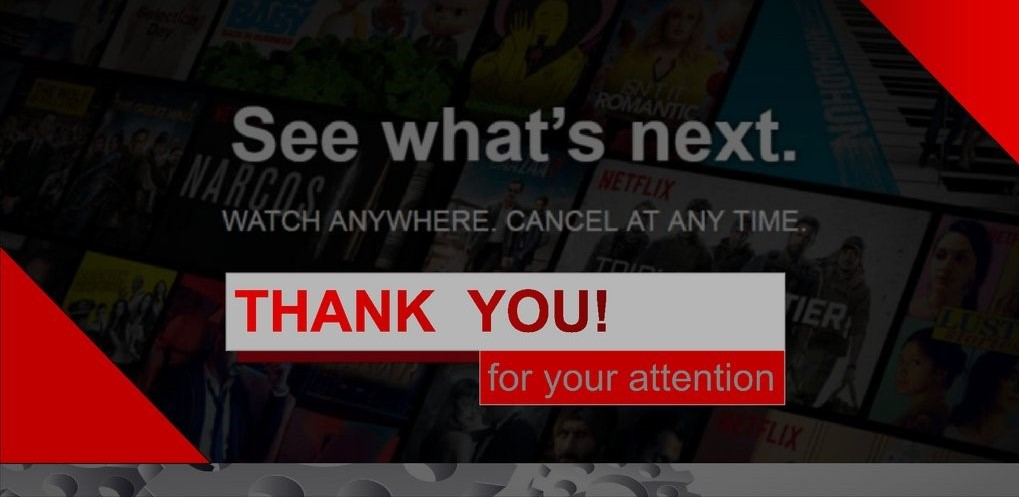